<a href="https://colab.research.google.com/github/suzzini/DS_Study/blob/main/%EC%88%9C%EC%97%B4%EC%A4%91%EC%9A%94%EB%8F%84(%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
## to_datetime을 통해 시간과 날짜를 다루기 쉬운 datetime64 형태로 변환합니다.
df['date'] = pd.to_datetime(df['date'])

In [4]:
## 변환된 date를 정렬해서 보겠습니다. 저장되지는 않습니다.
df['date'].sort_values()

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]

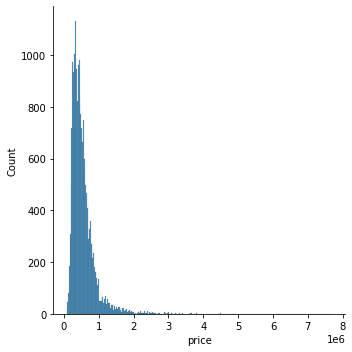

In [5]:
import seaborn as sns

sns.displot(df['price']);

- 타켓이 왼쪽으로 치우쳐져 있음이 확인 됨 => 로그 변환을 해주겠음
- outlier들 => 상위, 하위 5%씩 제거하겠음

In [6]:
# np.percentile 사용해 이상치 제거
import numpy as np 

df = df[(df['price'] >= np.percentile(df['price'], 0.05)) & 
        (df['price'] <= np.percentile(df['price'], 99.5))]

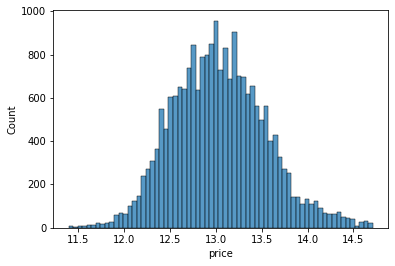

In [7]:
#로그변환을 하면 어떻게 되는지 그래프로 확인해보겠음

sns.histplot(np.log1p(df['price']));

정규분포 형태가 됨을 확인

In [8]:
#로그변환 진행

df['price']=np.log1p(df['price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
## 2015-03-01을 기준으로 훈련/테스트 세트를 분리합니다.
cutOff = pd.to_datetime('2015-03-01')
train = df[df['date'] < cutOff]
test  = df[df['date'] >= cutOff]

In [10]:
train.shape, test.shape

((16772, 21), (4721, 21))

## **Feature Engineering**

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,12.309987,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,13.195616,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,12.100718,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,13.311331,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,13.142168,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Feature description

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
-bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 함수로 feature engineering 진행

- 필요없는 컬럼들 : id, date
- renovated : 했다면 1, 안했다면 0으로 바꿔주겠음
- ['rooms'] : bathroom+bedroom 해주어 새로운 컬럼 생성
- ['new_grade'] : waterfront + view + condition + grade 해주어 새로운 컬럼 생성
- df['total_sqft']=df['sqft_above']+df['sqft_basement']+df['sqft_living'] 

In [12]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2003,
       1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957, 1977,
       1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007, 1987,
       1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969, 1948,
       2015, 2008, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [13]:
def feature_engineering(df):

  df=df.drop(['id', 'date'],axis=1)

  df['rooms']=df['bedrooms'] + df['bathrooms']
  df['new_grade']=df['waterfront']+df['view']+df['condition']+df['grade']
  df['total_sqft']=df['sqft_above']+df['sqft_basement']+df['sqft_living']

  return df

train=feature_engineering(train)
test=feature_engineering(test)

In [14]:
train['renovated']=[0 if i==0 else 1 for i in train['yr_renovated']]

In [15]:
test['renovated']=[0 if i==0 else 1 for i in test['yr_renovated']]

In [16]:
train=train.drop(['yr_renovated'],axis=1)
test=test.drop(['yr_renovated'],axis=1)

In [17]:
target = 'price'

## X_train, y_train, X_test, y_test 데이터로 분리
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

## 모델 생성하여 특성 중요도와 순열 중요도 확인하기

#### 1. 결정트리 모델 생성

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=2, max_depth=5)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.7708279000728329
테스트 정확도:  0.7278292986759285


In [50]:
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=2)
)

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'decisiontreeregressor__max_depth': [5,7,9,10,None], 
    'decisiontreeregressor__min_samples_leaf' : [1,5,10,15] 
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, #150번 수행한거임 50*3
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    6.0s finished


In [51]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1_score: ', clf.best_score_)

최적 하이퍼파라미터:  {'decisiontreeregressor__min_samples_leaf': 15, 'decisiontreeregressor__max_depth': None}
f1_score:  0.8344567387786337


최적의 하이퍼파라미터로 모델 재생성하기

In [72]:
pipe=make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor(random_state=2, min_samples_leaf= 15)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.904558126618829
테스트 정확도:  0.8047765543559249


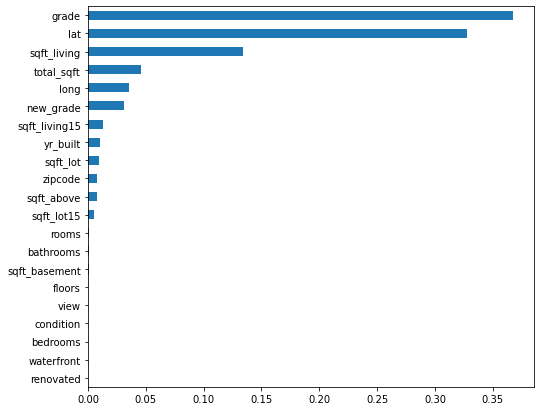

In [73]:
#특성 중요도 확인하기
import matplotlib.pyplot as plt

tree = pipe.named_steps['decisiontreeregressor']

importances = pd.Series(tree.feature_importances_, X_train.columns)
plt.figure(figsize=(8,7))
importances.sort_values().plot.barh();

In [74]:
pipe.named_steps

{'decisiontreeregressor': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best'),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [63]:
pip install eli5

     |████████████████████████████████| 112kB 6.5MB/s 


In [77]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['decisiontreeregressor'], # model
    scoring='r2',
    n_iter=5, # 다른 random seed를 사용하여 5번 반복, 한 특성당 5번 섞을꺼다
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_test_transformed = pipe.named_steps['standardscaler'].transform(X_test)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test_transformed, y_test);

In [78]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

sqft_basement   -0.000769
bedrooms        -0.000369
bathrooms       -0.000289
renovated        0.000000
waterfront       0.000000
rooms            0.000470
floors           0.000758
condition        0.000835
view             0.000884
sqft_lot15       0.008131
zipcode          0.008481
sqft_above       0.010218
sqft_lot         0.013388
sqft_living15    0.017137
yr_built         0.020464
new_grade        0.034905
total_sqft       0.046483
long             0.081697
sqft_living      0.118810
grade            0.145164
lat              0.695717
dtype: float64

순열중요도와 특성중요도와 큰 차이가 있는지는 않는 듯함.
- 기본 특성 중요도는 빠르지만 특성 종류에 따라 부정확한 결과가 나올 수 있어 주의가 필요함
- 순열 중요도 사용하면 더욱 정확한 계산이 가능함

### 랜덤포레스트 모델 생성

In [79]:
from sklearn.ensemble import RandomForestRegressor

pipe=make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.9840634713506312
테스트 정확도:  0.8548696449614447


In [84]:
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=2)
)

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'randomforestregressor__max_depth': [5,7,9,10,None], 
    'randomforestregressor__min_samples_leaf' : [1,5,10,15],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2']
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, #150번 수행한거임 50*3
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.0min finished


In [85]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('f1_score: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__min_samples_leaf': 10, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': None}
f1_score:  0.8814186560772185


최적의 하이퍼파라미터로 모델 재생성하기

In [86]:
from sklearn.ensemble import RandomForestRegressor

pipe=make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=2,min_samples_leaf=10, max_features='auto')
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.929741068138734
테스트 정확도:  0.8552537207248364


순열 중요도 확인하기

In [87]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['randomforestregressor'], # model
    scoring='r2',
    n_iter=5, # 다른 random seed를 사용하여 5번 반복, 한 특성당 5번 섞을꺼다
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_test_transformed = pipe.named_steps['standardscaler'].transform(X_test)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test_transformed, y_test);

In [88]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

sqft_basement   -0.000393
rooms           -0.000367
bedrooms        -0.000144
condition        0.000047
renovated        0.000104
floors           0.000187
bathrooms        0.000223
view             0.000474
waterfront       0.000816
sqft_lot15       0.003896
zipcode          0.004734
sqft_lot         0.005833
sqft_above       0.007042
sqft_living15    0.009128
yr_built         0.009138
grade            0.046445
sqft_living      0.046925
new_grade        0.052504
total_sqft       0.053176
long             0.063227
lat              0.680523
dtype: float64

In [89]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.6805 ± 0.0192,lat
0.0632 ± 0.0048,long
0.0532 ± 0.0047,total_sqft
0.0525 ± 0.0062,new_grade
0.0469 ± 0.0028,sqft_living
0.0464 ± 0.0048,grade
0.0091 ± 0.0012,yr_built
0.0091 ± 0.0015,sqft_living15
0.0070 ± 0.0004,sqft_above
0.0058 ± 0.0008,sqft_lot


In [91]:
print('특성 삭제 전:', X_train.shape, X_test.shape)

특성 삭제 전: (16772, 21) (4721, 21)


In [92]:
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_test_selected = X_test[features]

In [94]:
print('특성 삭제 후:', X_train_selected.shape, X_test_selected.shape)

특성 삭제 후: (16772, 12) (4721, 12)


다시 모델 재생성하기

In [95]:
from sklearn.ensemble import RandomForestRegressor

pipe=make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=2,min_samples_leaf=10, max_features='auto')
)

pipe.fit(X_train_selected, y_train)
print('훈련 정확도: ', pipe.score(X_train_selected, y_train))
print('테스트 정확도: ', pipe.score(X_test_selected, y_test))

훈련 정확도:  0.9283072573340178
테스트 정확도:  0.8548090157185316


[feature 제거 전 정확도]

- 훈련 정확도:  0.929741068138734
- 테스트 정확도:  0.8552537207248364

*큰 차이 없는 것을 확인*

다음 시간에는 lightGBM과 같은 앙상블 모델 학습을 통해 pdp와 shap을 이용하여 해석하는 법을 공부해보겠음